In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report,confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sn 

In [2]:
df = pd.read_csv("../../Dataset/Ecommerce_data.csv")
print(df.shape)
df.head(5)

(24000, 2)


,Text,label
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household
1,"Contrast living Wooden Decorative Box,Painted ...",Household
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories


In [3]:
df.label.value_counts()

label
Household                 6000
Electronics               6000
Clothing & Accessories    6000
Books                     6000
Name: count, dtype: int64

In [4]:
df['label_num'] = df['label'].map({
    'Household' : 0, 
    'Books': 1, 
    'Electronics': 2, 
    'Clothing & Accessories': 3
})

df.head(5)

,Text,label,label_num
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household,0
1,"Contrast living Wooden Decorative Box,Painted ...",Household,0
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics,2
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories,3
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories,3


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    df.Text, 
    df.label_num, 
    test_size=0.2,
    random_state=2022,
    stratify=df.label_num
)

In [6]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (19200,)
Shape of X_test:  (4800,)


KNN model

In [7]:
clf = Pipeline([
    ('vectorizer_tfidf',TfidfVectorizer()),
    ('KNN',KNeighborsClassifier())
])

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1200
           1       0.97      0.95      0.96      1200
           2       0.97      0.97      0.97      1200
           3       0.97      0.98      0.97      1200

    accuracy                           0.96      4800
   macro avg       0.96      0.96      0.96      4800
weighted avg       0.96      0.96      0.96      4800



In [8]:
y_test[:5]

20706    0
19166    2
15209    3
2462     1
6621     3
Name: label_num, dtype: int64

In [9]:
y_pred[:5]

array([0, 2, 3, 1, 0])

Naive-Bayers model

In [10]:
from sklearn.naive_bayes import MultinomialNB

clf = Pipeline([
    ('vectorizer_tfidf',TfidfVectorizer()),
    ('Multi NB',MultinomialNB())
])

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1200
           1       0.98      0.92      0.95      1200
           2       0.97      0.97      0.97      1200
           3       0.97      0.99      0.98      1200

    accuracy                           0.96      4800
   macro avg       0.96      0.96      0.96      4800
weighted avg       0.96      0.96      0.96      4800



In [11]:
y_test[:5]

20706    0
19166    2
15209    3
2462     1
6621     3
Name: label_num, dtype: int64

In [12]:
y_pred[:5]

array([0, 2, 3, 1, 0])

Random Forest model

In [13]:
from sklearn.ensemble import RandomForestClassifier

clf = Pipeline([
    ('vectorizer_tfidf',TfidfVectorizer()),
    ('Random forest',RandomForestClassifier())
])

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1200
           1       0.97      0.98      0.98      1200
           2       0.98      0.96      0.97      1200
           3       0.98      0.98      0.98      1200

    accuracy                           0.97      4800
   macro avg       0.97      0.97      0.97      4800
weighted avg       0.97      0.97      0.97      4800



Use text pre-processing to remove stop words, punctuations and apply lemmatization

In [14]:
import spacy 

nlp = spacy.load("en_core_web_sm")

def preprocess(text):
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    
    return " ".join(filtered_tokens) 

In [15]:
df['preprocessed_txt'] = df['Text'].apply(preprocess)

In [16]:
df.head()

,Text,label,label_num,preprocessed_txt
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household,0,Urban Ladder Eisner Low Study Office Computer ...
1,"Contrast living Wooden Decorative Box,Painted ...",Household,0,contrast live Wooden Decorative Box Painted Bo...
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics,2,IO Crest SY PCI40010 PCI RAID Host Controller ...
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories,3,ISAKAA Baby Socks bear 8 Years- Pack 4 6 8 12 ...
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories,3,Indira Designer woman Art Mysore Silk Saree Bl...


In [17]:
df.Text[0]

'Urban Ladder Eisner Low Back Study-Office Computer Chair(Black) A study in simple. The Eisner study chair has a firm foam cushion, which makes long hours at your desk comfortable. The flexible meshed back is designed for air-circulation and support when you lean back. The curved arms provide ergonomic forearm support. Adjust the height using the gas lift to find that comfortable position and the nylon castors make it easy to move around your space. Chrome legs refer to the images for dimension details any assembly required will be done by the UL team at the time of delivery indoor use only.'

In [18]:
df.preprocessed_txt[0]

'Urban Ladder Eisner Low Study Office Computer Chair(Black study simple Eisner study chair firm foam cushion make long hour desk comfortable flexible mesh design air circulation support lean curved arm provide ergonomic forearm support adjust height gas lift find comfortable position nylon castor easy space chrome leg refer image dimension detail assembly require UL team time delivery indoor use'

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    df.preprocessed_txt, 
    df.label_num,
    test_size=0.2,
    random_state=2025,
    stratify=df.label_num
)

In [20]:
clf = Pipeline([
    ('vectorizer_tfidf',TfidfVectorizer()),
    ('Random forest',RandomForestClassifier())
])

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1200
           1       0.98      0.98      0.98      1200
           2       0.98      0.99      0.98      1200
           3       0.99      0.98      0.98      1200

    accuracy                           0.98      4800
   macro avg       0.98      0.98      0.98      4800
weighted avg       0.98      0.98      0.98      4800



In [21]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1169,    8,   14,    9],
       [  14, 1174,    7,    5],
       [   9,    6, 1184,    1],
       [   7,   11,    5, 1177]])

Text(95.72222222222221, 0.5, 'Truth')

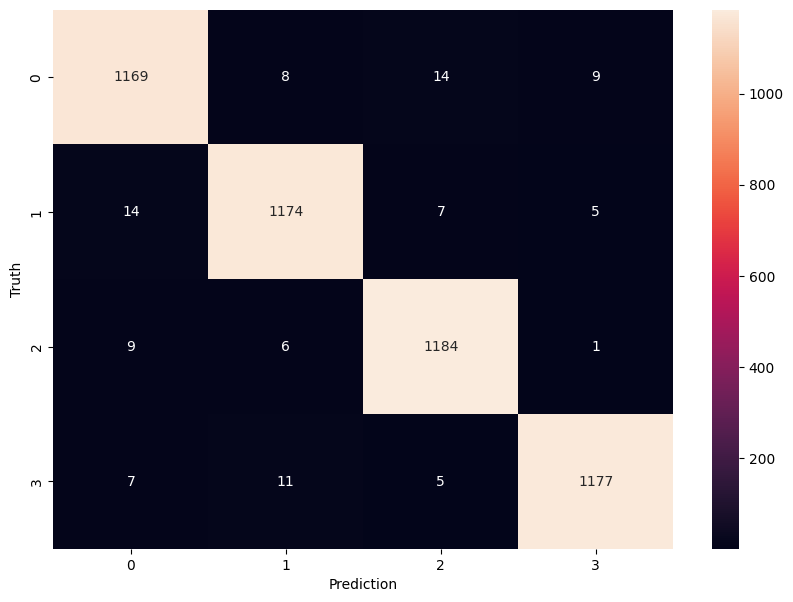

In [22]:
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')